In [116]:
import matplotlib.pyplot as plt
import pandas as pd

df_excel = pd.read_excel('D:\IFB-207-Pemrograman-Dasar-DD\Tugas-DataFrame\disperkim-od_16985_jumlah_produksi_sampah_berdasarkan_kabupatenkota_v3_data.xlsx',  sheet_name='data')

df = df_excel[['nama_kabupaten_kota', 'jumlah_produksi_sampah', 'tahun']]
df = df.rename(columns ={
    'nama_kabupaten_kota' : 'Kabupaten/Kota',
    'jumlah_produksi_sampah' : 'Produksi Sampah (ton)',
    'tahun' : 'Tahun'
})

df.to_excel("1.xlsx", index=False)
df

,Kabupaten/Kota,Produksi Sampah (ton),Tahun
0,KABUPATEN BOGOR,1511.15,2015
1,KABUPATEN SUKABUMI,419.01,2015
2,KABUPATEN CIANJUR,981.41,2015
3,KABUPATEN BANDUNG,1895.94,2015
4,KABUPATEN GARUT,464.74,2015
...,...,...,...
238,KOTA BEKASI,NaN,2023
239,KOTA DEPOK,NaN,2023
240,KOTA CIMAHI,NaN,2023
241,KOTA TASIKMALAYA,NaN,2023


In [117]:
total_sampah_kabkota = {}
df['Produksi Sampah (ton)'] = df['Produksi Sampah (ton)'].fillna(0.0)

for i, row in df.iterrows():
    kabupaten_kota = row['Kabupaten/Kota']
    banyak_sampah = row['Produksi Sampah (ton)']
    
    if kabupaten_kota not in total_sampah_kabkota:
        total_sampah_kabkota[kabupaten_kota] = 0
    
    total_sampah_kabkota[kabupaten_kota] += banyak_sampah

df_total = pd.DataFrame.from_dict(total_sampah_kabkota, orient='index', columns=['Total Sampah'])
df_total.reset_index(inplace=True)
df_total.rename(columns={'index': 'Kabupaten/Kota'}, inplace=True)

df.to_excel("2.xlsx", index=False)
df_total

,Kabupaten/Kota,Total Sampah
0,KABUPATEN BOGOR,13113.49
1,KABUPATEN SUKABUMI,4038.19
2,KABUPATEN CIANJUR,6497.92
3,KABUPATEN BANDUNG,11934.04
4,KABUPATEN GARUT,4484.29
5,KABUPATEN TASIKMALAYA,3531.33
6,KABUPATEN CIAMIS,2329.72
7,KABUPATEN KUNINGAN,2486.63
8,KABUPATEN CIREBON,3205.17
9,KABUPATEN MAJALENGKA,2593.39


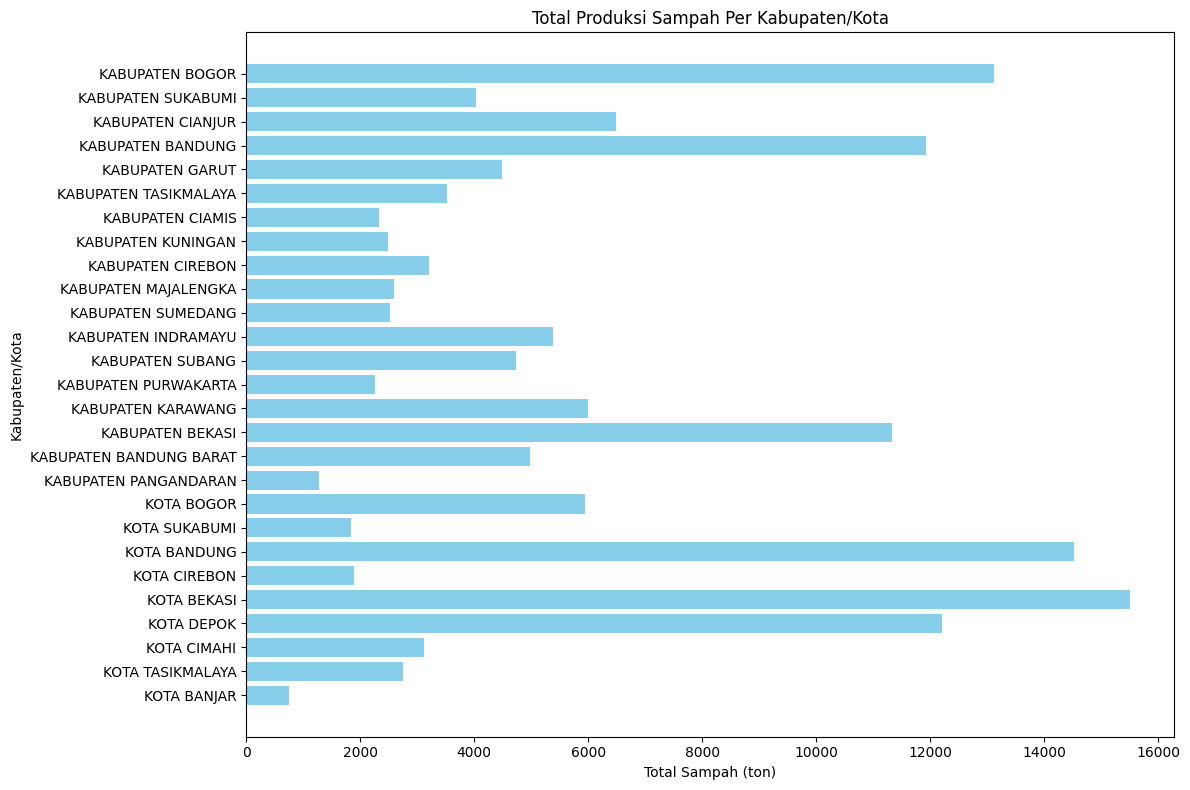

In [118]:
plt.figure(figsize=(12, 8))
plt.barh(df_total['Kabupaten/Kota'], df_total['Total Sampah'], color='skyblue')
plt.xlabel('Total Sampah (ton)')
plt.ylabel('Kabupaten/Kota')
plt.title('Total Produksi Sampah Per Kabupaten/Kota')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [119]:
def cekKategori(Produksi_Sampah):
    if Produksi_Sampah > 400:
        kategori = "Sampah Harus Segera Ditanggulang"
    else:
        kategori = "Aman"
    return kategori

df['Kategori'] = df['Produksi Sampah (ton)'].apply(cekKategori)

df.to_excel("3.xlsx", index=False)
df

,Kabupaten/Kota,Produksi Sampah (ton),Tahun,Kategori
0,KABUPATEN BOGOR,1511.15,2015,Sampah Harus Segera Ditanggulang
1,KABUPATEN SUKABUMI,419.01,2015,Sampah Harus Segera Ditanggulang
2,KABUPATEN CIANJUR,981.41,2015,Sampah Harus Segera Ditanggulang
3,KABUPATEN BANDUNG,1895.94,2015,Sampah Harus Segera Ditanggulang
4,KABUPATEN GARUT,464.74,2015,Sampah Harus Segera Ditanggulang
...,...,...,...,...
238,KOTA BEKASI,0.00,2023,Aman
239,KOTA DEPOK,0.00,2023,Aman
240,KOTA CIMAHI,0.00,2023,Aman
241,KOTA TASIKMALAYA,0.00,2023,Aman


In [120]:
df['Biaya'] = df['Produksi Sampah (ton)'].apply(lambda x: x * 123000)

df.to_excel("4.xlsx", index=False)
df

,Kabupaten/Kota,Produksi Sampah (ton),Tahun,Kategori,Biaya
0,KABUPATEN BOGOR,1511.15,2015,Sampah Harus Segera Ditanggulang,185871450.0
1,KABUPATEN SUKABUMI,419.01,2015,Sampah Harus Segera Ditanggulang,51538230.0
2,KABUPATEN CIANJUR,981.41,2015,Sampah Harus Segera Ditanggulang,120713430.0
3,KABUPATEN BANDUNG,1895.94,2015,Sampah Harus Segera Ditanggulang,233200620.0
4,KABUPATEN GARUT,464.74,2015,Sampah Harus Segera Ditanggulang,57163020.0
...,...,...,...,...,...
238,KOTA BEKASI,0.00,2023,Aman,0.0
239,KOTA DEPOK,0.00,2023,Aman,0.0
240,KOTA CIMAHI,0.00,2023,Aman,0.0
241,KOTA TASIKMALAYA,0.00,2023,Aman,0.0


In [121]:
df['Total Bayar (pajak 5%)'] = df.apply(lambda x : x['Biaya'] if x['Kategori'] == "Aman" else x['Biaya'] + (x['Biaya'] * 0.05), axis = 1)

df.to_excel("5.xlsx", index=False)
df

,Kabupaten/Kota,Produksi Sampah (ton),Tahun,Kategori,Biaya,Total Bayar (pajak 5%)
0,KABUPATEN BOGOR,1511.15,2015,Sampah Harus Segera Ditanggulang,185871450.0,195165022.5
1,KABUPATEN SUKABUMI,419.01,2015,Sampah Harus Segera Ditanggulang,51538230.0,54115141.5
2,KABUPATEN CIANJUR,981.41,2015,Sampah Harus Segera Ditanggulang,120713430.0,126749101.5
3,KABUPATEN BANDUNG,1895.94,2015,Sampah Harus Segera Ditanggulang,233200620.0,244860651.0
4,KABUPATEN GARUT,464.74,2015,Sampah Harus Segera Ditanggulang,57163020.0,60021171.0
...,...,...,...,...,...,...
238,KOTA BEKASI,0.00,2023,Aman,0.0,0.0
239,KOTA DEPOK,0.00,2023,Aman,0.0,0.0
240,KOTA CIMAHI,0.00,2023,Aman,0.0,0.0
241,KOTA TASIKMALAYA,0.00,2023,Aman,0.0,0.0
